In [1]:
%pylab inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import math

from methods import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Loads files as dataframes
data_ent_followup = create_df("f_Sections F,G,h - Ent.dta", "Analysis files/data/Followup/{0}")

data_edu_baseline = create_df("education.dta", "Analysis files/data/Baseline/{0}")

data_ent_baseline = create_df("Sections F,G,h - Ent.dta", "Analysis files/data/Baseline/{0}")

data_age_baseline = create_df("personal info.dta", "Analysis files/data/Baseline/{0}")

In [3]:
#Removes attrition from the baseline dataframes
updated_edu_baseline = remove_attrition(data_edu_baseline, data_ent_followup)
updated_ent_baseline = remove_attrition(data_ent_baseline, data_ent_followup)
updated_age_baseline = remove_attrition(data_age_baseline, data_ent_followup)

Number of households at followup:  961
Number of households at adjusted baseline:  961
Number of households at followup:  961
Number of households at adjusted baseline:  961
Number of households at followup:  961
Number of households at adjusted baseline:  961


In [4]:
#Creates big array with the desired columns of edu_baseline, ent_baseline, and ent_followup.
#Contains the columns specified below.
#Corrects NaN values to zero.
ent_edu_master = updated_ent_baseline[['treatment_x', 'rescode', 'enterprise', 'soleent']].join(data_ent_followup[['f_enterprise', 'f_soleent']])
ent_edu_master = ent_edu_master.join(updated_edu_baseline[["edulow", "eduvoc", "eduhigh"]])
ent_edu_master = ent_edu_master.join(updated_age_baseline[["age"]])
ent_edu_master = ent_edu_master.fillna(0)

In [5]:
#Find number of participants in each age bin
ent_edu_master['age'] = ent_edu_master['age'].apply(lambda x: x//10)
ent_edu_master.loc[ent_edu_master.age==1, 'age'] = 2
ent_edu_master.loc[ent_edu_master.age==6, 'age'] = 5

for i in range(10):
    print(len(ent_edu_master.loc[ent_edu_master['age'] == i, :]))
    
ageBins = ['18-29', '30-39', '40-49', '50-69']

for i in range(2, 6):
    ent_edu_master.loc[ent_edu_master['age']==i, 'agebin'] = ageBins[i-2]



0
0
142
323
354
142
0
0
0
0


In [6]:
#add education column that has a 1,2, or 3 (and soon a 4) to indicate level of edu (or aggregate)
ent_edu_master['education'] = ent_edu_master['edulow'] + ent_edu_master['eduvoc'] * 2 + ent_edu_master['eduhigh'] * 3

In [7]:
ent_edu_master

,treatment_x,rescode,enterprise,soleent,f_enterprise,f_soleent,edulow,eduvoc,eduhigh,age,agebin,education
0,0.0,11101,1,1.0,1,1.0,0.0,0.0,1.0,4.0,40-49,3.0
1,0.0,11102,1,1.0,0,0.0,0.0,0.0,1.0,4.0,40-49,3.0
2,0.0,11103,1,1.0,0,0.0,0.0,0.0,1.0,4.0,40-49,3.0
3,0.0,11201,0,0.0,1,0.0,0.0,0.0,1.0,3.0,30-39,3.0
4,0.0,11203,1,1.0,1,0.0,1.0,0.0,0.0,2.0,18-29,1.0
5,0.0,11301,1,0.0,1,0.0,0.0,1.0,0.0,4.0,40-49,2.0
6,0.0,11302,1,0.0,1,0.0,0.0,1.0,0.0,5.0,50-69,2.0
7,0.0,11304,1,1.0,0,0.0,1.0,0.0,0.0,3.0,30-39,1.0
8,0.0,11402,1,1.0,1,1.0,0.0,0.0,1.0,4.0,40-49,3.0
9,0.0,11403,1,0.0,1,0.0,0.0,0.0,1.0,5.0,50-69,3.0


In [8]:
#Creates new data frame with twice as many rows (first set for baseline, second for followup) 
ent_edu_graphing = ent_edu_master.copy();
ent_edu_graphing = ent_edu_graphing.append(ent_edu_graphing, ignore_index=True)
#new row to indicate baseline (false) or followup (true)
ent_edu_graphing['baselineOrFollowup'] = ent_edu_graphing.index > len(ent_edu_master.index) - 1

#adds combined_enterprise that contains enterprise for the first half and f_enterprise for the second half
df = pd.DataFrame({'enterprise': ent_edu_master['enterprise'].append(ent_edu_master['f_enterprise'], ignore_index=True)})
ent_edu_graphing['combined_enterprise'] = df['enterprise']

#adds combined_enterprise that contains soleent for the first half and f_soleent for the second half
df = pd.DataFrame({'soleent': ent_edu_master['soleent'].append(ent_edu_master['f_soleent'], ignore_index=True)})
ent_edu_graphing['combined_soleent'] = df['soleent']

#append ent_edu_graphing to itself with an education value of 4 and an age value of 10 in order to get aggregate of all edu types and age bins
copyDF = ent_edu_graphing.copy()
copyDF["education"] = 4
copyDF["age"] = 10
ent_edu_graphing = ent_edu_graphing.append(copyDF, ignore_index=True, sort=False)

print('rescode treatment_x enterprise soleent f_enterprise f_soleent edulow eduvoc eduhigh baselineOrFollowup education')

rescode treatment_x enterprise soleent f_enterprise f_soleent edulow eduvoc eduhigh baselineOrFollowup education


In [9]:
ent_edu_graphing

,treatment_x,rescode,enterprise,soleent,f_enterprise,f_soleent,edulow,eduvoc,eduhigh,age,agebin,education,baselineOrFollowup,combined_enterprise,combined_soleent
0,0.0,11101,1,1.0,1,1.0,0.0,0.0,1.0,4.0,40-49,3.0,False,1,1.0
1,0.0,11102,1,1.0,0,0.0,0.0,0.0,1.0,4.0,40-49,3.0,False,1,1.0
2,0.0,11103,1,1.0,0,0.0,0.0,0.0,1.0,4.0,40-49,3.0,False,1,1.0
3,0.0,11201,0,0.0,1,0.0,0.0,0.0,1.0,3.0,30-39,3.0,False,0,0.0
4,0.0,11203,1,1.0,1,0.0,1.0,0.0,0.0,2.0,18-29,1.0,False,1,1.0
5,0.0,11301,1,0.0,1,0.0,0.0,1.0,0.0,4.0,40-49,2.0,False,1,0.0
6,0.0,11302,1,0.0,1,0.0,0.0,1.0,0.0,5.0,50-69,2.0,False,1,0.0
7,0.0,11304,1,1.0,0,0.0,1.0,0.0,0.0,3.0,30-39,1.0,False,1,1.0
8,0.0,11402,1,1.0,1,1.0,0.0,0.0,1.0,4.0,40-49,3.0,False,1,1.0
9,0.0,11403,1,0.0,1,0.0,0.0,0.0,1.0,5.0,50-69,3.0,False,1,0.0


In [10]:
treatment = 2

In [11]:
#pass in the master df
def ci(df, educationOrAge, specificBin, treatment):
    p_hat = 0.5 
    z = 1.96 #for 95% confidence
    if (specificBin == 'all'):
        n = len(df[(df["treatment_x"] == treatment)])
    else:
        n = len(df[(df["treatment_x"] == treatment) & (df[educationOrAge] == specificBin)])       
    return z * math.pow((p_hat*(1-p_hat))/n, 0.5)
    

In [12]:
#edu with THREE different categories (edulow, eduvoc, eduhigh)
counted_edu_graphing = pd.DataFrame(columns=['soleent', 'error', 'edu', 'baseline'])
for i in range(1, 4):
    soleent_count = ent_edu_master[(ent_edu_master.education == i) & (ent_edu_master.treatment_x == treatment)].soleent.sum()
    total_count = len(ent_edu_master[(ent_edu_master.education == i) & (ent_edu_master.treatment_x == treatment)])
    error = ci(ent_edu_master, "education", i, treatment)
    counted_edu_graphing = counted_edu_graphing.append({'soleent': soleent_count/total_count, 'error': error, 'edu': i, 'baseline': True}, ignore_index=True)
    f_soleent_count = ent_edu_master[(ent_edu_master.education == i) & (ent_edu_master.treatment_x == treatment)].f_soleent.sum()
    f_total_count = len(ent_edu_master[(ent_edu_master.education == i) & (ent_edu_master.treatment_x == treatment)])
    counted_edu_graphing = counted_edu_graphing.append({'soleent': f_soleent_count/f_total_count, 'error': error, 'edu': i, 'baseline': False}, ignore_index=True)
    
error = ci(ent_edu_master, "education", "all", treatment)
soleent_count = ent_edu_master[ent_edu_master.treatment_x == treatment].soleent.sum()
total_count = len(ent_edu_master[ent_edu_master.treatment_x == treatment])
counted_edu_graphing = counted_edu_graphing.append({'soleent': soleent_count/total_count, 'error': error, 'edu': 4, 'baseline': True}, ignore_index=True)  

f_soleent_count = ent_edu_master[ent_edu_master.treatment_x == treatment].f_soleent.sum()
f_total_count = len(ent_edu_master[ent_edu_master.treatment_x == treatment])
counted_edu_graphing = counted_edu_graphing.append({'soleent': f_soleent_count/f_total_count, 'error': error, 'edu': 4, 'baseline': False}, ignore_index=True)  


eduBins = ['low.b', 'low.f', 'voc.b', 'voc.f', 'high.b', 'high.f', 'agg.b', 'agg.f']

for i in range(8):
    counted_edu_graphing.loc[counted_edu_graphing.index==i, 'edubin'] = eduBins[i]

counted_edu_graphing



,soleent,error,edu,baseline,edubin
0,0.368421,0.158977,1,True,low.b
1,0.631579,0.158977,1,False,low.f
2,0.388889,0.115494,2,True,voc.b
3,0.555556,0.115494,2,False,voc.f
4,0.356846,0.063127,3,True,high.b
5,0.406639,0.063127,3,False,high.f
6,0.364672,0.052309,4,True,agg.b
7,0.461538,0.052309,4,False,agg.f


<ErrorbarContainer object of 3 artists>

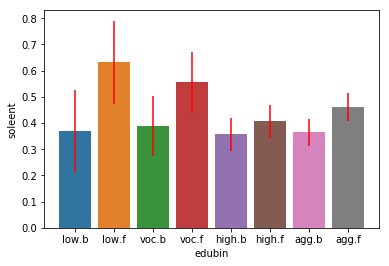

In [13]:
ax = sns.barplot(x='edubin', y="soleent", data=counted_edu_graphing, ci=None)

ax.errorbar(x=counted_edu_graphing['edubin'],y=counted_edu_graphing['soleent'], yerr=counted_edu_graphing['error'], fmt='none', c='r')

In [14]:
#edu with TWO different categories (edulow &eduvoc, eduhigh)
counted_edu2_graphing = pd.DataFrame(columns=['soleent', 'error', 'edu', 'baseline'])
ent_edu_master2 = ent_edu_master.copy()
ent_edu_master2.loc[ent_edu_master2.education == 1, 'education'] = 2

for i in range(2, 4):
    soleent_count = ent_edu_master2[(ent_edu_master2.education == i) & (ent_edu_master2.treatment_x == treatment)].soleent.sum()
    total_count = len(ent_edu_master2[(ent_edu_master2.education == i) & (ent_edu_master2.treatment_x == treatment)])
    error = ci(ent_edu_master2, "education", i, treatment)
    counted_edu2_graphing = counted_edu2_graphing.append({'soleent': soleent_count/total_count, 'error': error, 'edu': i, 'baseline': True}, ignore_index=True)
    f_soleent_count = ent_edu_master2[(ent_edu_master2.education == i) & (ent_edu_master2.treatment_x == treatment)].f_soleent.sum()
    f_total_count = len(ent_edu_master2[(ent_edu_master2.education == i) & (ent_edu_master2.treatment_x == treatment)])
    counted_edu2_graphing = counted_edu2_graphing.append({'soleent': f_soleent_count/f_total_count, 'error': error, 'edu': i, 'baseline': False}, ignore_index=True)
    
error = ci(ent_edu_master2, "education", "all", treatment)
soleent_count = ent_edu_master2[ent_edu_master2.treatment_x == treatment].soleent.sum()
total_count = len(ent_edu_master2[ent_edu_master2.treatment_x == treatment])
counted_edu2_graphing = counted_edu2_graphing.append({'soleent': soleent_count/total_count, 'error': error, 'edu': 4, 'baseline': True}, ignore_index=True)  

f_soleent_count = ent_edu_master2[ent_edu_master2.treatment_x == treatment].f_soleent.sum()
f_total_count = len(ent_edu_master2[ent_edu_master2.treatment_x == treatment])
counted_edu2_graphing = counted_edu2_graphing.append({'soleent': f_soleent_count/f_total_count, 'error': error, 'edu': 4, 'baseline': False}, ignore_index=True)  


eduBins = ['low&voc.b', 'low&voc.f', 'high.b', 'high.f', 'agg.b', 'agg.f']

for i in range(6):
    counted_edu2_graphing.loc[counted_edu2_graphing.index==i, 'edubin'] = eduBins[i]

counted_edu2_graphing

,soleent,error,edu,baseline,edubin
0,0.381818,0.093439,2,True,low&voc.b
1,0.581818,0.093439,2,False,low&voc.f
2,0.356846,0.063127,3,True,high.b
3,0.406639,0.063127,3,False,high.f
4,0.364672,0.052309,4,True,agg.b
5,0.461538,0.052309,4,False,agg.f


<ErrorbarContainer object of 3 artists>

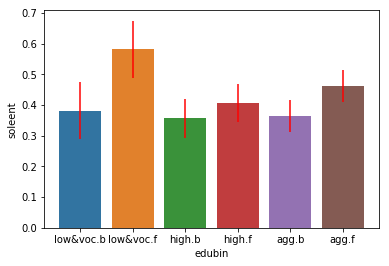

In [15]:
ax = sns.barplot(x='edubin', y="soleent", data=counted_edu2_graphing, ci=None)

ax.errorbar(x=counted_edu2_graphing['edubin'],y=counted_edu2_graphing['soleent'], yerr=counted_edu2_graphing['error'], fmt='none', c='r')

In [16]:
#age

counted_age_graphing = pd.DataFrame(columns=['soleent', 'error', 'age', 'agebin', 'baseline'])
for i in range(2, 6):
    soleent_count = ent_edu_master[(ent_edu_master.age == i) & (ent_edu_master.treatment_x == treatment)].soleent.sum()
    total_count = len(ent_edu_master[(ent_edu_master.age == i) & (ent_edu_master.treatment_x == treatment)])
    error = ci(ent_edu_master, "age", i, treatment)
    counted_age_graphing = counted_age_graphing.append({'soleent': soleent_count/total_count, 'error': error, 'age': i, 'baseline': True}, ignore_index=True)
    f_soleent_count = ent_edu_master[(ent_edu_master.age == i) & (ent_edu_master.treatment_x == treatment)].f_soleent.sum()
    f_total_count = len(ent_edu_master[(ent_edu_master.age == i) & (ent_edu_master.treatment_x == treatment)])
    counted_age_graphing = counted_age_graphing.append({'soleent': f_soleent_count/f_total_count, 'error': error, 'age': i, 'baseline': False}, ignore_index=True)
    
error = ci(ent_edu_master, "age", "all", treatment)
soleent_count = ent_edu_master[ent_edu_master.treatment_x == treatment].soleent.sum()
total_count = len(ent_edu_master[ent_edu_master.treatment_x == treatment])
counted_age_graphing = counted_age_graphing.append({'soleent': soleent_count/total_count, 'error': error, 'age': 10, 'baseline': True}, ignore_index=True)  

f_soleent_count = ent_edu_master[ent_edu_master.treatment_x == treatment].f_soleent.sum()
f_total_count = len(ent_edu_master[ent_edu_master.treatment_x == treatment])
counted_age_graphing = counted_age_graphing.append({'soleent': f_soleent_count/f_total_count, 'error': error, 'age': 10, 'baseline': False}, ignore_index=True)  


ageBins = ['18-29.b','f1', '30-39.b', 'f2', '40-49.b', 'f3', '50-69.b', 'f4', 'agg.b', 'f5']

for i in range(10):
    counted_age_graphing.loc[counted_age_graphing.index==i, 'agebin'] = ageBins[i]

counted_age_graphing




,soleent,error,age,agebin,baseline
0,0.166667,0.141451,2,18-29.b,True
1,0.354167,0.141451,2,f1,False
2,0.371901,0.089091,3,30-39.b,True
3,0.495868,0.089091,3,f2,False
4,0.361538,0.085952,4,40-49.b,True
5,0.430769,0.085952,4,f3,False
6,0.538462,0.135902,5,50-69.b,True
7,0.557692,0.135902,5,f4,False
8,0.364672,0.052309,10,agg.b,True
9,0.461538,0.052309,10,f5,False


<ErrorbarContainer object of 3 artists>

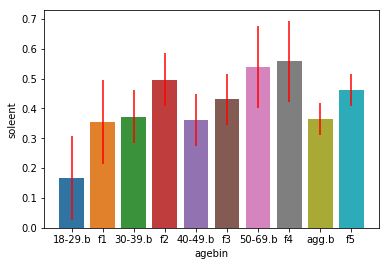

In [17]:
ax = sns.barplot(x='agebin', y="soleent", data=counted_age_graphing, ci=None)

ax.errorbar(x=counted_age_graphing['agebin'],y=counted_age_graphing['soleent'], yerr=counted_age_graphing['error'], fmt='none', c='r')

In [18]:
#ax = sns.barplot(x='education', y="combined_enterprise", hue="baselineOrFollowup", data=ent_edu_graphing[ent_edu_graphing['treatment_x']==treatment], ci=None)


In [19]:
#ax = sns.barplot(x='education', y="combined_enterprise", hue="baselineOrFollowup", data=ent_edu_graphing[ent_edu_graphing['treatment_x']==treatment], ci=None)


#ax.errorbar(x=ent_edu_graphing['education'],y=ent_edu_graphing['combined_enterprise'], yerr=yerrDF, fmt='none', c='r')

In [20]:
#plt.bar(x='education', height='combined_enterprise', data=ent_edu_graphing[ent_edu_graphing['treatment_x']==treatment])